In [1]:
import db

In [2]:
# db.create_db()

In [3]:
import ethereum_repository

In [4]:
# ethereum_repository.populate()

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

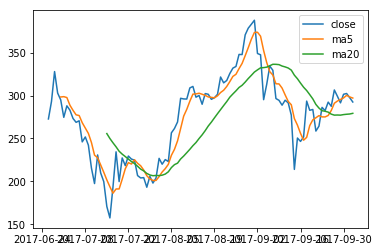

In [6]:
origin = ethereum_repository.get_data()
close_prices = {}
five_days = []
twenty_days = []
ma5 = {}
ma20 = {}

count = 0

for x in origin['close']:
    count +=1
    if count > 100:
        break
    close_price = origin['close'][x]
    close_prices[x] = close_price
    five_days.append(close_price)
    if len(five_days) < 5:
        continue
    if len(five_days) == 6:
        five_days.pop(0)
    average_5 = sum(five_days) / len(five_days)
    ma5[x] = average_5
    
count = 0

for x in origin['close']:
    count += 1
    if count > 100:
        break
    close_price = origin['close'][x]
    twenty_days.append(close_price)
    
    if len(twenty_days) < 20:
        continue
    if len(twenty_days) == 21:
        twenty_days.pop(0)
    average_20 = sum(twenty_days) / len(twenty_days)
    ma20[x] = average_20

data = {
    'close': close_prices,
    'ma5': ma5,
    'ma20': ma20
}
df = pd.DataFrame(data)
df.plot()

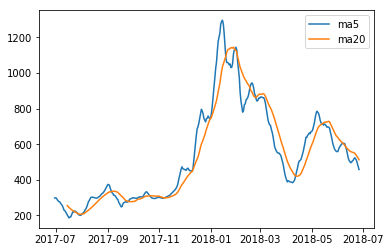

In [7]:
origin = ethereum_repository.get_data()
data = {
    'close': origin['close']
}
close_series = pd.Series(data['close'])
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
del data['close']
df = pd.DataFrame(data)
df.plot()

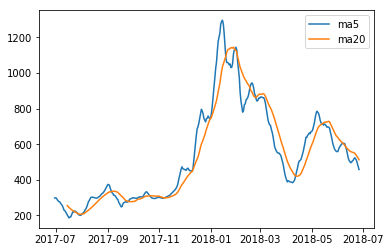

In [8]:
(index, origin) = ethereum_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# data['close'] = close_series
df = pd.DataFrame(data, new_index)
df.plot()

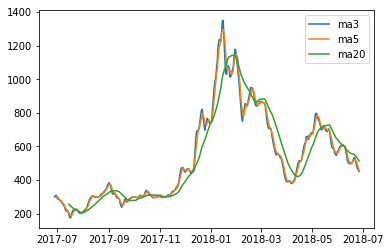

In [9]:
(index, origin) = ethereum_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma3'] = close_series.rolling(window=3).mean()
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# data['close'] = close_series
df = pd.DataFrame(data, new_index)
df.plot()

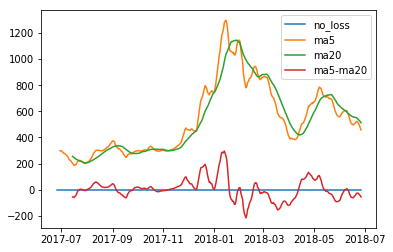

In [10]:
(index, origin) = ethereum_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['no_loss'] = 0
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
data['ma5-ma20'] = data['ma5'] - data['ma20']
# b = data['ma20'] - data['ma5']
# data['close'] = close_series
df = pd.DataFrame(data, new_index)

df.plot()

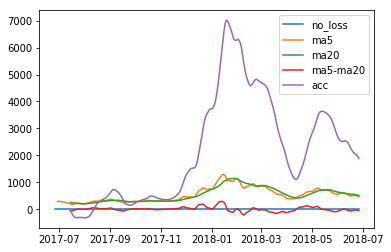

In [11]:
import math
(index, origin) = ethereum_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['no_loss'] = 0
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
data['ma5-ma20'] = data['ma5'] - data['ma20']
data['acc'] = []
for v in data['ma5-ma20']:
    if math.isnan(v) or len(data['acc']) == 0 or math.isnan(data['acc'][-1]):
        data['acc'].append(v)
    else:
        data['acc'].append(v + data['acc'][-1])

df = pd.DataFrame(data, new_index)
df.plot()
